In [144]:
# Импорт необходимых библиотек
import numpy as np # Библиотека для работы с массивами и матрицами
import tensorflow as tf # Основная библиотека для работы с нейронными сетями
from tensorflow.keras.datasets import mnist # Набор данных MNIST для обучения и
# тестирования
from tensorflow.keras.models import Sequential # Класс для создания
#последовательной модели
from tensorflow.keras.layers import Dense, Flatten # Слои нейронной сети: Dense
#- полносвязный, Flatten - преобразование формы
from tensorflow.keras.utils import to_categorical # Функция для преобразования
#меток в категориальный формат
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import plotly.express as px
import pandas as pd
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Нормализация данных
# Преобразуем значения пикселей из диапазона [0, 255] в [0, 1] для ускорения обучения
x_train = x_train.astype('float32') / 255


In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Нормализация данных
# Преобразуем значения пикселей из диапазона [0, 255] в [0, 1] для ускорения обучения
x_train = x_train.astype('float32') / 255
# Преобразование меток в категориальный формат
# Это необходимо для многоклассовой классификации, где каждая метка представляется в виде вектора
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [146]:
# Создание модели MLP
model = Sequential() # Инициализация последовательной модели
# Добавление слоев в модель
model.add(Flatten(input_shape=(28, 28))) 
# Преобразование 2D изображений 28x28 в 1D вектор длиной 784

model.add(Dense(256, activation='relu')) # Второй скрытый слой с 64 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu')) # Второй скрытый слой с 64 нейронами и функцией активации ReLU
model.add(Dense(10, activation='softmax')) # Выходной слой с 10 нейронами (по числу классов) и функцией активации softmax

c:\Users\febor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [147]:
# Компиляция модели
# Определяем оптимизатор, функцию потерь и метрику для оценки модели
model.compile(optimizer='adam', # Оптимизатор Adam, популярный выбор для обучения нейронных сетей
    loss='categorical_crossentropy', # Функция потерь для многоклассовой классификации
    metrics=['accuracy']) # Метрика для оценки точности модели

In [152]:
# Обучение модели
# Проводим обучение модели на тренировочных данных
history = model.fit(x_train, y_train, # Тренировочные данные и метки
 epochs=50, # Количество эпох обучения
 batch_size=64, # Размер батча
 validation_split=0.2) # Доля данных для валидации

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.0166e-05 - val_accuracy: 0.9827 - val_loss: 0.1226
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.3398e-06 - val_accuracy: 0.9827 - val_loss: 0.1241
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.3185e-06 - val_accuracy: 0.9829 - val_loss: 0.1264
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.8430e-06 - val_accuracy: 0.9828 - val_loss: 0.1287
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.6383e-06 - val_accuracy: 0.9833 - val_loss: 0.1308
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.8278e-06 - val_accuracy: 0.9835 - val_loss: 0.1331
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.4163e-06 - val_accuracy: 0.9832 - val_loss: 0.1359
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - los

In [149]:



# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9801 - loss: 33.9165
Точность на тестовых данных: 0.98


In [150]:


# Подготовка данных для графика точности
accuracy_data = pd.DataFrame({
    'Эпоха': range(1, len(history.history['accuracy']) + 1),
    'Точность на обучении': history.history['accuracy'],
    'Точность на валидации': history.history['val_accuracy']
})

# Построение 
fig_accuracy = px.line(accuracy_data, x='Эпоха', y=['Точность на обучении', 'Точность на валидации'],
                       labels={'value': 'Точность', 'variable': 'Датасет'},
                       title='График точности на обучающем и валидационном наборе')

# Показать график
fig_accuracy.show()


In [151]:

# Подготовка данных для графика потерь
loss_data = pd.DataFrame({
    'Эпоха': range(1, len(history.history['loss']) + 1),
    'Потери на обучении': history.history['loss'],
    'Потери на валидации': history.history['val_loss']
})

# Построение графика 
fig_loss = px.line(loss_data, x='Эпоха', y=['Потери на обучении', 'Потери на валидации'],
                   labels={'value': 'Потери', 'variable': 'Датасет'},
                   title='График потерь на обучающем и валидационном наборе')

# Показать график
fig_loss.show()


### 1. Изменим количество нейронов в скрытых слоях и оценим, как это влияет на точность модели.

При изначальных 128 нейронах на первом слое и 64 на втором, точность accuracy равна 0.97. Затраченное время 13.2 с.


При изменении колличества нейронов в 2 раза, точность увеличилась до 0.98. Время увелилось до 16 с.



При изменении колличества нейронов в 16 раз, точность увеличилась до 0.98. Время увелилось до 3 мин. 28 с.


Можем сделать вывод что нет смылса брать нейронов больше 256 на первом слое и 128 на втором, достигается лучшая точность, время увеличилось не сильно.

### 2. Добавим или удалим скрытые слои и проанализируем изменения в производительности сети.

При добавлении 2 скрытых слоёв точность не изменилась. Время увеличилось до 26 секнуд.

При 1 скрытом слое на 526 нейронов, точность не изменилась. На 128 так же. Время умеьшилось до 12 секнунд.

### 3. Используем различные функции активации: попробуем использовать  функции активации, такие как sigmoid или tanh, и сравним результаты с исходной моделью.

При использовании функции активации sigmoid точность accuracy упала до 0.97 при 256 нейронах на первом слое и 128 на втором

При использовании функции активации tanh точность accuracy упала до 0.97 при 256 нейронах на первом слое и 128 на втором

Графики меняются незначительно, описывать конкретней не вижу сысла

### 4. Оптимизация гиперпараметров: изменим параметры обучения, такие как размер батча и количество эпох, и оценим их влияние на процесс обучения и итоговую точность

При увчеличении размера батча и колличество этоп до 20 и 64 соответсвенно, тоность на тестовых данных не изменилась и равна 0.98 , но на тренировочных приближается к 1, что может привести к переобучению модели.

На графике можно заметить что точность падает до 0.97 на 15 и 16 эпохе, но позже позвращается до 0.98, так же на этих эпохах возрастают потери.

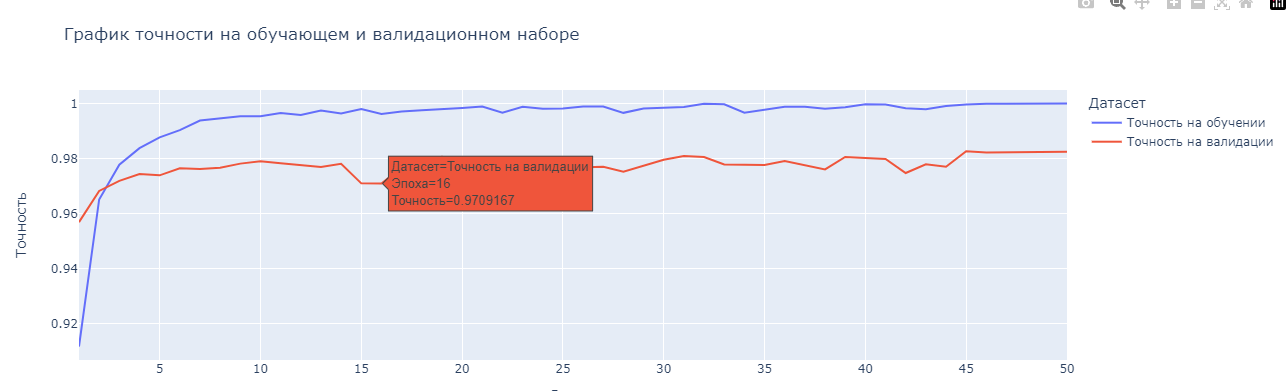